# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [2]:
# YOUR CODE HERE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
# YOUR CODE HERE
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")
df = pd.read_csv(bookReviewDataSet_filename, header=0) # YOUR CODE HERE

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [4]:
df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


In [5]:
df.dtypes

Review             object
Positive Review      bool
dtype: object

In [6]:
np.sum(df.isnull(), axis = 0)

Review             0
Positive Review    0
dtype: int64

In [7]:
df.shape

(1973, 2)

In [8]:
df["Positive Review"].value_counts()

False    993
True     980
Name: Positive Review, dtype: int64

In [20]:
example = df["Review"][123]
print(type(example),"\n"+example)

<class 'str'> 
While this book is a good reminder to high school students and their parents of the kinds of illiberal attitudes extant on many college campuses, I cannot recommend it to other readers. The author unfortunately perpetuates the right-wing-Republican-only stereotype believed by many outside evangelical Christianity. She battles as much for her political leanings away from gun control and in favor of all Bush administration policies as she does for the truth claims of the gospel. Indeed, in reading some of the chapters, it is difficult to see that she has any concept of a Christian worldview that might veer in any part from Republican platform positions. This is really too bad, because she makes many good points and appears to be courageous in her positions. I would not have begrudged her political point of view at all, had she made a clearer distinction between that and her theological position



##### This assignment presents an opportunity for me to practice NLP - so, I chose the Book Reviews dataset where I would want to predict the "Positive Review" label. Since the only two classes are True and False, it is a classification problem.

##### The current bookreviews data set is low-dimensional in its current form: it has 2 columns (1 feature and 1 label), 1973 rows in total, does not have any missing data. The label classes are split almost equally between the two classes - True and False, which is why we dont have to worry about class imbalance.

##### From printing out the first few rows, the only feature is the "Reviews" column, which is of datatype Object and contains the reviews as strings, as seen in the cell above. For this problem, we will use NLP to prepare the data for ingestion into the model.

##### For data preparation, we need to transform the "Reviews" text to numerical feature vectors using the TF-IDF, which calculates how relevant a word is in a document relative to a collection of documents. Because TF-IDF provides an understanding of the context of the text data, applying this technique for our sentiment analysis classification (classifying a review as positive or negative) would be more appropriate compared to other techniques.

##### After transforming the data, I want to implement a Logistic Regression, evaluate the model based on the AUC, and optimize the model using the loss and accuracy scores to determine the optimal parameters. Additionally, I am curious how many False Positives and False Negatives will result after optimizing the model.


## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [39]:
# assigning feature and label to X and y

y = df['Positive Review'] 
X = df['Review']

In [40]:
# splitting data into training and test sets with training size of 80%
# additionally stratifying the split by the feature, so that the test set is representative of the whole dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=.80, random_state=1234)

X_train.head()

4      We have now entered a second time of deep conc...
283    This was by far the best Genero/Kenzie novel o...
453    If you are looking for ideas and techniques th...
70     I have enjoyed many of Mark's novels (Do You K...
344    Originally published in the early 1900's, this...
Name: Review, dtype: object

In [41]:
# implementing TF-IDF Vectorizer to transform text to numerical vectors

# 1. TfidfVectorizer object instantiated with no minimum document frequency parameters
# I also specify the size of n-grams I want to use is from 1 to 2 words (unigrams and bigrams)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2))

# 2. vectorizer fit to raw training feature (the text reviews)
tfidf_vectorizer.fit(X_train)
      
# 3. both the training and test data transformed to vectors using the fitted vectorizer and its 'transform' attribute
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# 4. Print the matrix
print(X_train_tfidf.todense())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [42]:
# training and evaluating a Logistic Regression on transformed data with no hyperparameters

# 1. LogisticRegression model object created and fit to the transformed training data with no parameters
model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)

# 2. probability predictions made on the transformed test data and second output column selected
probability_predictions = model.predict_proba(X_test_tfidf)[:,1]

# 3. class predictions made on the transformed test data
class_label_predictions = model.predict(X_test_tfidf)

# 4. Area Under the ROC curve computed for the test data using function 'roc_auc_score()'
auc = roc_auc_score(y_test, probability_predictions)
print('AUC on the test data: {:.4f}'.format(auc))

# 5. size of resulting feature space
len_feature_space = len(tfidf_vectorizer.vocabulary_)
print('The size of the feature space: {0}'.format(len_feature_space))

AUC on the test data: 0.9148
The size of the feature space: 144313


In [43]:
# picking two random reviews to see if the model predicted correctly

print('Review #1:\n')
print(X_test.to_numpy()[122])
print('\nPrediction: Is this a good review? {}\n'.format(class_label_predictions[124])) 
print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[124]))

print('\nReview #2:\n')
print(X_test.to_numpy()[126])
print('\nPrediction: Is this a good review? {}\n'.format(class_label_predictions[238])) 
print('Actual: Is this a good review? {}\n'.format(y_test.to_numpy()[238]))

Review #1:

After reading Being Peace, I ordered additional copies for all my close friends. This book is both thought-provoking and accessible. Thich Nhat Hanh  has a way of presenting Buddhist lessons and ways of being, ways of living and thinking about ourselves and our relationships to others and the world in a style that is almost deceptively simple and deeply thoughtful. I highly recommend this book as either an introduction to Buddhist thought or as a way of enriching any life.


Prediction: Is this a good review? True

Actual: Is this a good review? True


Review #2:

At first glance this is a great book. However, once you've read it a few times you begin to notice the bottles of coke that feature in almost every illustration. The author, illustrator, and publisher should be ashamed of themselves. We all know that kids are exposed to lots of advertising on TV and at the movies, but do we really need to start worrying about product placements in children's books as well? This is

In [44]:
# our feature space is 144313 - let's experiment with the minimum document frequency parameter for the vectorizer
min_dfs = list(range(1,20))
auc_mindfs = []
fspace_mindfs = []

for min_df in min_dfs:
        
    # 1. Create a new TfidfVectorizer object with a new value for hyperparameter min_df in each iteration
    tfidf_vectorizer = TfidfVectorizer(min_df=min_df, ngram_range=(1,2))

    # 2. Fit the vectorizer to X_train
    tfidf_vectorizer.fit(X_train)

    # 3. Transform the training and test data
    X_train_tfidf = tfidf_vectorizer.transform(X_train)
    X_test_tfidf = tfidf_vectorizer.transform(X_test)

    # 4. Create a LogisticRegression model object, and fit a Logistic Regression model to the transformed 
    # training data
    model = LogisticRegression(max_iter=200)
    model.fit(X_train_tfidf, y_train)
    
    # 5. Make probability predictions on the transformed test data and save the values of the second column
    probability_predictions = model.predict_proba(X_test_tfidf)[:,1]

    # 6. Compute the Area Under the ROC curve (AUC) for the test data.
    auc = roc_auc_score(y_test, probability_predictions)
    auc_mindfs.append(auc)

    # 7. Compute the size of the resulting feature space using the 'vocabulary_' attribute of the vectorizer
    len_feature_space = len(tfidf_vectorizer.vocabulary_)
    fspace_mindfs.append(len_feature_space)

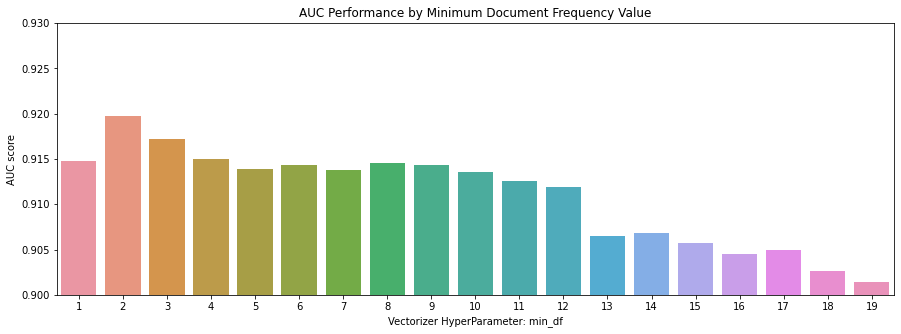

In [47]:
# AUC's
plt.figure(figsize=(15,5)) 
ax = sns.barplot(x=min_dfs, y=auc_mindfs)
g = ax.set_xticklabels([f'{i}' for i in min_dfs])
ax.set_xlabel('Vectorizer HyperParameter: min_df')
ax.set_ylabel('AUC score')
ax.set_ylim([0.90, 0.93])
g = plt.title('AUC Performance by Minimum Document Frequency Value')

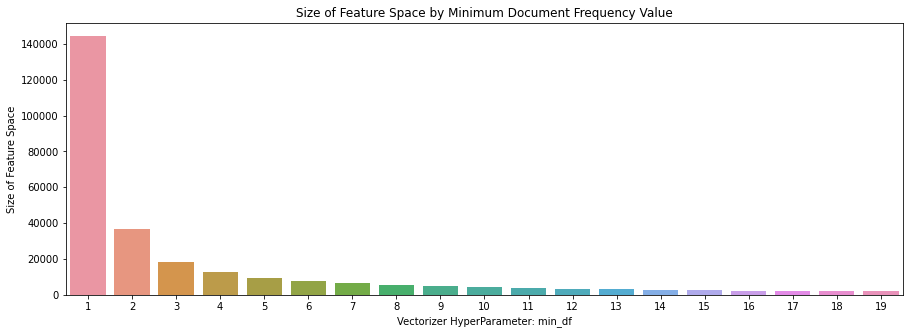

In [46]:
# Size of Feature Space
plt.figure(figsize=(15,5)) 
ax = sns.barplot(x=min_dfs, y=fspace_mindfs)
g = ax.set_xticklabels([f'{i}' for i in min_dfs])
ax.set_xlabel('Vectorizer HyperParameter: min_df')
ax.set_ylabel('Size of Feature Space')
g = plt.title('Size of Feature Space by Minimum Document Frequency Value')

##### We get highest AUC when minimum document frequency is 2. With this value the feature space decreases significantly as well. Let's rerun the TF-IDF vectorizer with this parameter.

In [49]:
tfidf_vectorizer = TfidfVectorizer(min_df=2, ngram_range=(1,2))
tfidf_vectorizer.fit(X_train)
      
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

##### Moving on to the Logistic Regression hyperparameter tuning, let's see how adjusting the regularization hyperparameter C will impact the model's log loss and accuracy.

In [50]:
def train_test_LR(X_train, y_train, X_test, y_test, c=1):
    '''
    Fit a Linear Regression classifier to the training data X_train, y_train.
    Return the loss and accuracy of resulting predictions on the test set.
    Parameters:
        C = Factor that controls how much regularization is applied to the model.
    '''
     # 1. Create the  scikit-learn LogisticRegression model object
    model = LogisticRegression(C=c, max_iter=200)
  
    # 2. Fit the model to the training data below
    model.fit(X_train, y_train)
    
    # 3. Make predictions on the test data using the predict_proba() method
    probability_predictions = model.predict_proba(X_test)
    
  
    # 4. Compute the log loss on 'probability_predictions'
    l_loss = log_loss(y_test, probability_predictions)
    
        
    # 5. Make predictions on the test data using the predict() method and compute accuracy
    class_label_predictions = model.predict(X_test)
    acc_score = accuracy_score(y_test, class_label_predictions)

    
    return l_loss, acc_score

# specifying a list of values for C to iterate through and evaluate performance
cs = [10**i for i in range(-10,10)]
ll_cs = []
acc_cs = []

for c in cs:
    loss, acc = train_test_LR(X_train_tfidf, y_train, X_test_tfidf, y_test, c)
    ll_cs.append(loss)
    acc_cs.append(acc)

print(cs[acc_cs.index(max(acc_cs))])
print(cs[ll_cs.index(min(ll_cs))])

10
100


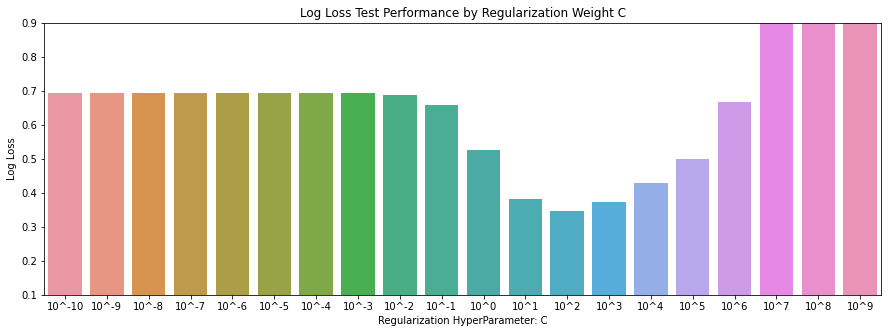

In [51]:
# Log Loss
plt.figure(figsize=(15,5)) 
ax = sns.barplot(x=cs, y=ll_cs)
g = ax.set_xticklabels([f'10^{i}' for i in range(-10,10)])
ax.set_xlabel('Regularization HyperParameter: C')
ax.set_ylabel('Log Loss')
ax.set_ylim([0.1, 0.9])
g = plt.title('Log Loss Test Performance by Regularization Weight C')

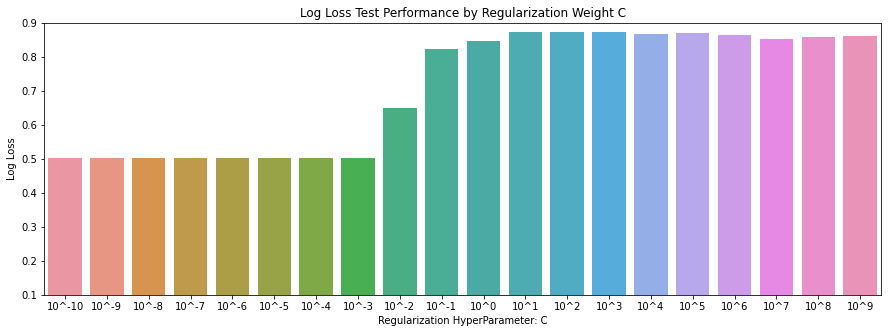

In [52]:
# Accuracy
plt.figure(figsize=(15,5)) 
ax = sns.barplot(x=cs, y=acc_cs)
g = ax.set_xticklabels([f'10^{i}' for i in range(-10,10)])
ax.set_xlabel('Regularization HyperParameter: C')
ax.set_ylabel('Log Loss')
ax.set_ylim([0.1, 0.9])
g = plt.title('Log Loss Test Performance by Regularization Weight C')

##### For our Logistic Regression, the model has minimal loss and a solid accuracy at C=100. Let's retrain the model with this hyperparameter.

In [53]:
model = LogisticRegression(max_iter=200, C=100)
model.fit(X_train_tfidf, y_train)

probability_predictions = model.predict_proba(X_test_tfidf)[:,1]

class_label_predictions = model.predict(X_test_tfidf)

auc = roc_auc_score(y_test, probability_predictions)
print('AUC on the test data: {:.4f}'.format(auc))

len_feature_space = len(tfidf_vectorizer.vocabulary_)
print('The size of the feature space: {0}'.format(len_feature_space))

AUC on the test data: 0.9291
The size of the feature space: 36986


##### The optimizations above have improved the AUC by ~2%, and the feature space decreased with increasing the min_df vectorizer parameter from 1 to 2, which means ignoring terms that appear in less than 2 documents.

## End of Model Building

##### Out of curiosity, I want to check the confusion matrix for the final Logistic Regression. The model did well on the testing phase a the TP and TN have significant weight, compared to FP and FN.

In [58]:
print('Confusion Matrix for the model: ')

pd.DataFrame(
confusion_matrix(y_test, class_label_predictions, labels=[True, False], normalize="true"),
columns=['Predicted: Review is Positive', 'Predicted: Review is Negative'],
index=['Actual: Review is Positive', 'Actual: Review is Negative']
)

Confusion Matrix for the model: 


,Predicted: Review is Positive,Predicted: Review is Negative
Actual: Review is Positive,0.887755,0.112245
Actual: Review is Negative,0.140704,0.859296
